# Clustering
## Sammy Samkough

#### Summary
In this notebook, I'll be exploring clustering algorithms, manipulating my data by using them, and showing different ways of executing it. I'll try my best to explain what's going on as I go. I'm going to import my data from a csv file using only python. Let's get started!

## Understanding Clustering
I think it's important for us to understand what we're talking about before we get right into it. I'm going to try my best to explain what clustering is and how we're going to go about this project.

### What is Clustering?
Cluster analysis, otherwise known as clustering, is when you have a set of objects (which can be data), and you group it in a way that objects in the same group ("same group" meaning clusters) are more similar to each other than to the ones in the other groups, or clusters ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)).

### Clustering Algorithms
Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)).

The algorithms we are going to be using are pulled from this website: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

The algorithms are:
1. K-Means Clustering
2. Mean-Shift Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
4. Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
5. Agglomerative Hierarchical Clustering

## K-Means Clustering
([Data Science - Andrea Trevino](https://www.datascience.com/blog/k-means-clustering))

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically.

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.  

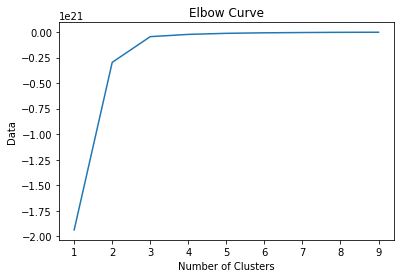

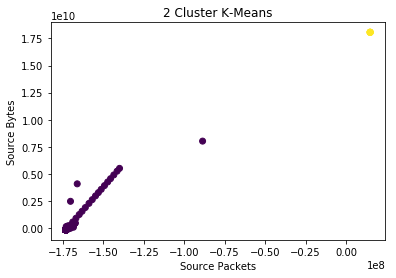

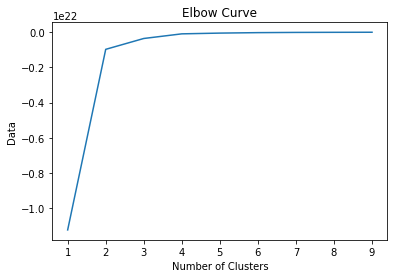

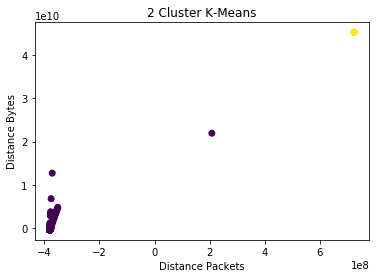

In [5]:
# reference: https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn

'''
- Pandas is for the purpose of importing the dataset in csv format
- Pylab is the graphing library used
- sklearn is used to devise the clustering algorithm
'''
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# grabbing the csv file and the first 1000 rows 
variables  = pd.read_csv(r'C:\Users\sammy\Desktop\DOWNLOADS\PROGRAMMING\Comodo\_Data-Analysis\netflow_day-02.csv',sep=",",index_col=False, nrows=1000)
'''
declare the headers we want to use as the X and Y
the headers we have are (in chronlogical order):
- time
- duration
- srcDevice
- dstDevice
- protocol
- srcPort
- dstPort
- srcPackets
- dstPackets
- srcBytes
- dstBytes
'''
Y = variables[['srcBytes']]
X = variables[['srcPackets']]

Nc = range(1, 10) # devising a range from 1 - 10 (representing our number of clusters)

# setting up kmeans stuff (not too sure what happens here)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans

# percentage of variance explained by the number of clusters
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score

# plotting the elbow curve
pl.plot(Nc, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Data')
pl.title('Elbow Curve')
pl.show()

# pca is a technique used to emphasize variation and bring out strong patterns in a dataset
# it's often used to make data easy to explore and visualize
# (http://setosa.io/ev/principal-component-analysis/)
pca = PCA(n_components = 1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

kmeans = KMeans(n_clusters = 2) # setting up the cluster # for kmeans
kmeansoutput = kmeans.fit(Y)
kmeansoutput

# setting up the plot
pl.figure('2 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c = kmeansoutput.labels_)
pl.xlabel('Source Packets')
pl.ylabel('Source Bytes')
pl.title('2 Cluster K-Means')
pl.show()

# ------------------------------------------------

# now using dstBytes and dstPackets
Y = variables[['dstBytes']]
X = variables[['dstPackets']]

Nc = range(1, 10) # devising a range from 1 - 10 (representing our number of clusters)

# setting up kmeans stuff (not too sure what happens here)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans

# percentage of variance explained by the number of clusters
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score

# plotting the elbow curve
pl.plot(Nc, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Data')
pl.title('Elbow Curve')
pl.show()

# pca is a technique used to emphasize variation and bring out strong patterns in a dataset
# it's often used to make data easy to explore and visualize
# (http://setosa.io/ev/principal-component-analysis/)
pca = PCA(n_components = 1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

kmeans = KMeans(n_clusters = 2) # setting up the cluster # for kmeans
kmeansoutput = kmeans.fit(Y)
kmeansoutput

# setting up the plot
pl.figure('2 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c = kmeansoutput.labels_)
pl.xlabel('Distance Packets')
pl.ylabel('Distance Bytes')
pl.title('2 Cluster K-Means')
pl.show()

## Mean-Shift Clustering
([Meanshift Algorithm for the Rest of Us (Python)](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/))

Meanshift is a clustering algorithm that assigns the datapoints to the clusters iteratively by shifting points towards the mode. The mode can be understood as the highest density of datapoints (in the region, in the context of the Meanshift). As such, it is also known as the mode-seeking algorithm. Meanshift algorithm has applications in the field of image processing and computer vision.

Given a set of datapoints, the algorithm iteratively assign each datapoint towards the closest cluster centroid. The direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

Unlike the popular K-Means algorithm, meanshift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

In [6]:
# reference: https://github.com/seckindinc/Python/blob/master/Algorithms/Unsupervised/Mean-Shift-Custering/Mean-Shift.ipynb

#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#Gathering Data
credit = pd.read_csv(r'C:\Users\sammy\Desktop\DOWNLOADS\PROGRAMMING\Comodo\_Data-Analysis\netflow_day-02.csv',sep=",",index_col=False, nrows=1000)

#First 5 Rows of Data
credit.head()

#Selecting Numeric Fields To Be Used In Modelling
X = credit[['srcPackets','dstPackets','srcBytes','dstBytes']]

#Loading Min Max Scaling and Creating New Data Frame
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

#Assining Column Names
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 20
